In [1]:
# Installing required Python libraries
!pip install streamlit pandas scikit-learn pyngrok

# Install Node.js (required for ngrok)
!npm install -g npm

# Verify installations
import streamlit
import pandas as pd
import sklearn
from pyngrok import ngrok
print("Libraries installed successfully!")

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏
changed 17 packages in 12s
⠏
⠏25 packages are looking for funding
⠏  run `npm fund` for details
⠏Libraries installed successfully!


In [2]:
# Load the dataset
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
# Check basic info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Convert TotalCharges to numeric, coercing errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check for missing values
print("Missing values in TotalCharges:", data['TotalCharges'].isnull().sum())
# Fill missing values with mean (if any)
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

# Verify the fix
print("TotalCharges dtype:", data['TotalCharges'].dtype)  # Should be float64


Missing values in TotalCharges: 11
TotalCharges dtype: float64


<ipython-input-4-37d7d1109b61>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)


In [5]:
# Drop customerID (not predictive)
data = data.drop('customerID', axis=1)

# Verify columns reduced to 20
print("Columns after dropping customerID:", data.columns.tolist())

Columns after dropping customerID: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [6]:
# Convert Churn from "Yes"/"No" to 1/0
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Verify conversion
print("Churn dtype:", data['Churn'].dtype)  # Should be int64
print("Churn value counts:\n", data['Churn'].value_counts())

Churn dtype: int64
Churn value counts:
 Churn
0    5174
1    1869
Name: count, dtype: int64


Churn Rate (%):
 Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


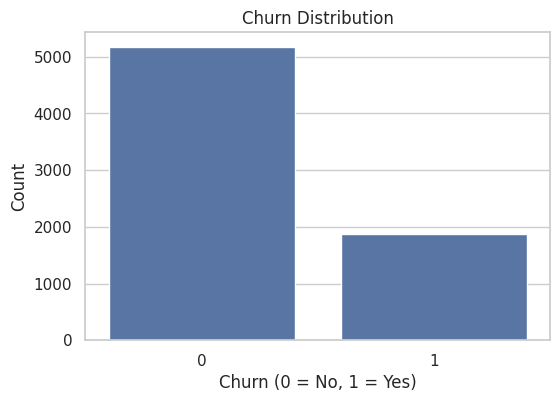

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# 1. Churn Rate
churn_rate = data['Churn'].value_counts(normalize=True) * 100
print("Churn Rate (%):\n", churn_rate)

# Bar plot for churn rate
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

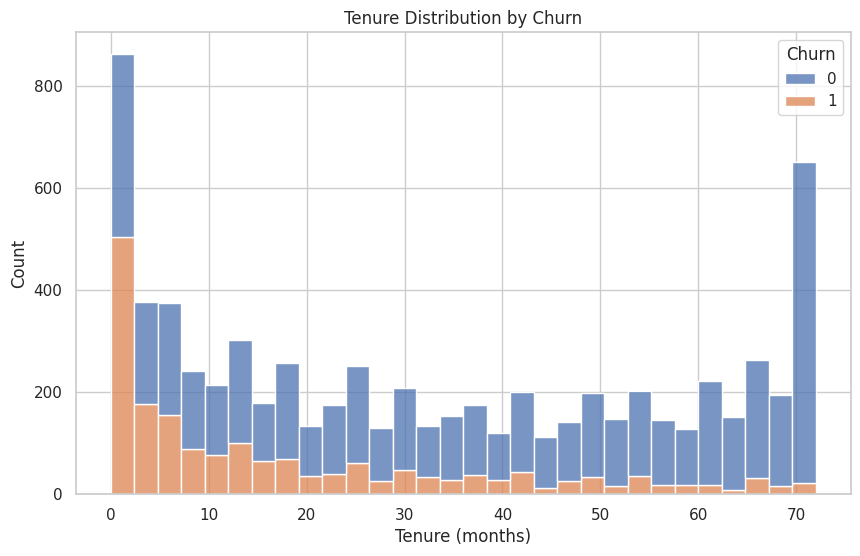

In [8]:
# 2. Tenure vs. Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="tenure", hue="Churn", multiple="stack", bins=30)
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()

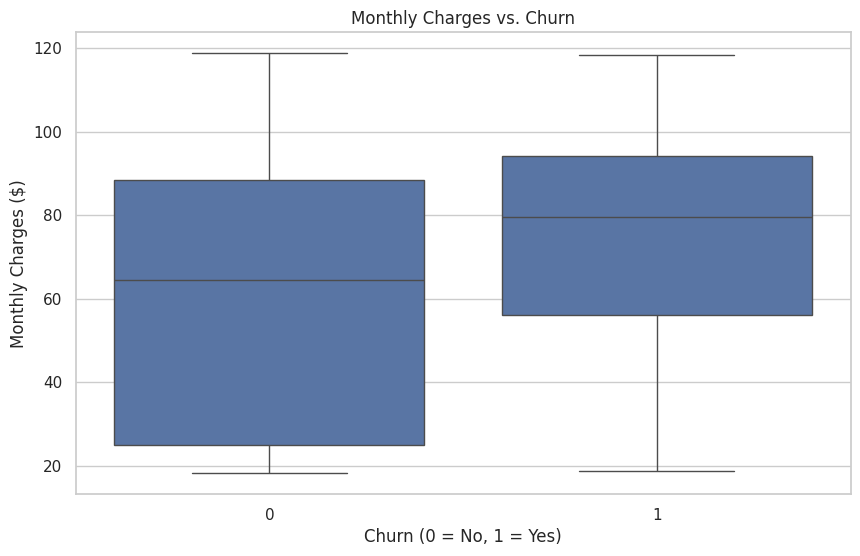

In [9]:
# 3. Monthly Charges vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x="Churn", y="MonthlyCharges", data=data)
plt.title("Monthly Charges vs. Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges ($)")
plt.show()

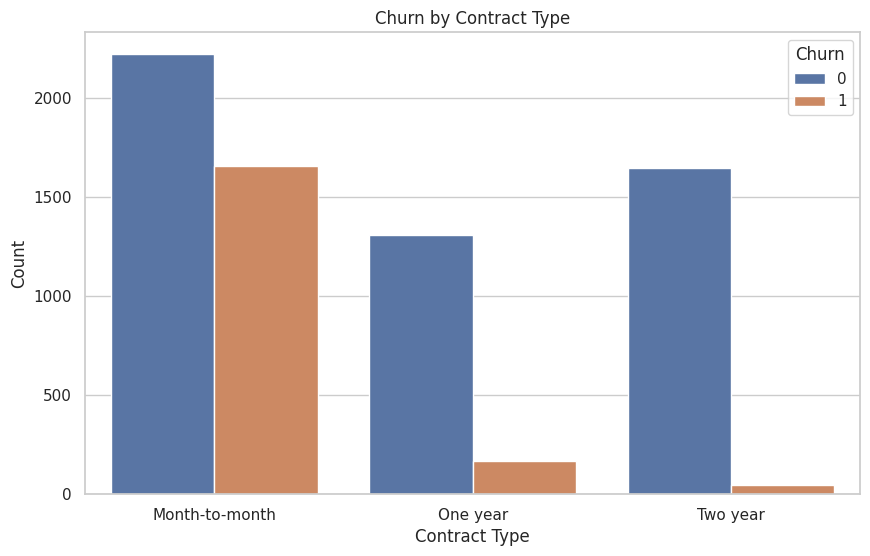

In [10]:
# 4. Contract Type vs. Churn
plt.figure(figsize=(10, 6))
sns.countplot(x="Contract", hue="Churn", data=data)
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

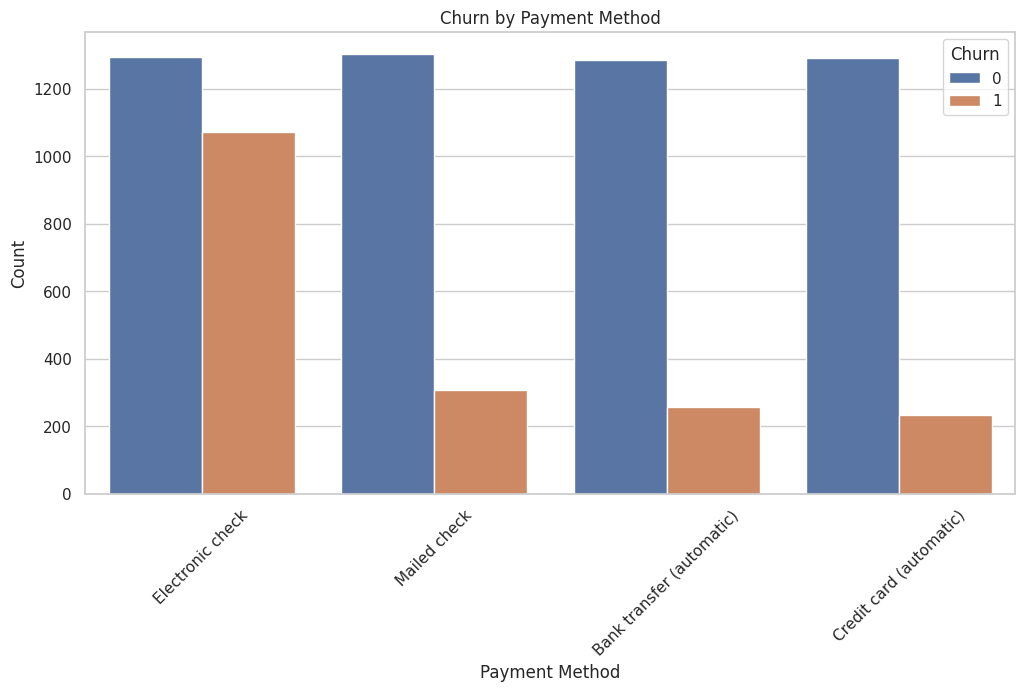

In [11]:
# 5. Payment Method vs. Churn
plt.figure(figsize=(12, 6))
sns.countplot(x="PaymentMethod", hue="Churn", data=data)
plt.title("Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [12]:
# List of categorical columns
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

# One-hot encode
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Check new shape
print("Shape after encoding:", data.shape)

Shape after encoding: (7043, 31)


In [13]:
print("First few rows:\n", data.head())

First few rows:
    SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.75      0         True   
4              0       2           70.70        151.65      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   
1                           False  ...             

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Numerical columns
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Scale features
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Verify scaling
print("Means after scaling:\n", data[numeric_cols].mean())

Means after scaling:
 tenure           -2.421273e-17
MonthlyCharges   -6.406285e-17
TotalCharges      8.070910e-17
dtype: float64


In [15]:
# Features (X) and target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5634, 30)
X_test shape: (1409, 30)
y_train shape: (5634,)
y_test shape: (1409,)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred_log = log_reg.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8211497515968772
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [17]:
# AUC-ROC Score
y_pred_proba_log = log_reg.predict_proba(X_test)[:, 1]
print("Logistic Regression AUC-ROC:", roc_auc_score(y_test, y_pred_proba_log))

Logistic Regression AUC-ROC: 0.8621127351020113


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7927608232789212
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [19]:
# AUC-ROC Score
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
print("Random Forest AUC-ROC:", roc_auc_score(y_test, y_pred_proba_rf))

Random Forest AUC-ROC: 0.8368415332222302


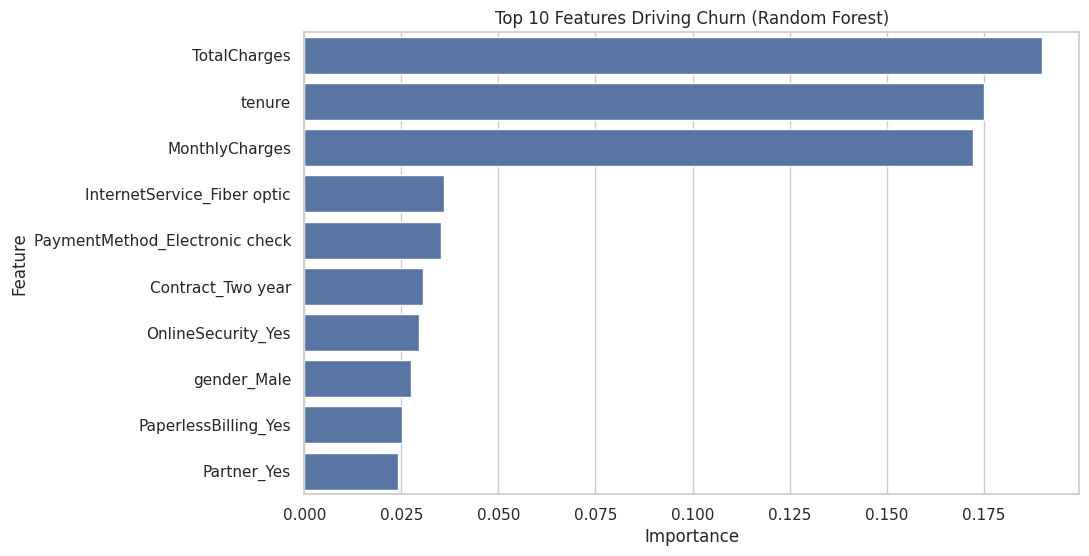

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance from Random Forest
importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
importance = importance.sort_values('Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance.head(10))
plt.title("Top 10 Features Driving Churn (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [21]:
# Print top 5 predictors
top_predictors = importance['Feature'].head(5).tolist()
print("Top 5 predictors of churn:", top_predictors)

Top 5 predictors of churn: ['TotalCharges', 'tenure', 'MonthlyCharges', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check']


In [22]:
# Training model with hyperparameter tuning and comparison
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV

# Split features and target
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print("Best Random Forest parameters:", grid_search_rf.best_params_)

# Train Logistic Regression for comparison
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Evaluate both models
for model, name in [(best_rf, "Random Forest"), (log_reg, "Logistic Regression")]:
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))


Best Random Forest parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}

Random Forest Results:
Accuracy: 0.8097941802696949
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

AUC-ROC: 0.8635683749624768

Logistic Regression Results:
Accuracy: 0.8211497515968772
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

AUC-ROC: 0.8621127351020113


In [23]:
import pickle

# Save the best Random Forest model
with open('rf_churn_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(X_train.columns.tolist(), f)

print("Model training with tuning completed. Best model and feature names saved.")

Model training with tuning completed. Best model and feature names saved.


In [24]:
!pip install streamlit

In [25]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load model, scaler, and feature names
with open('rf_churn_model.pkl', 'rb') as f:
    model = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
with open('feature_names.pkl', 'rb') as f:
    feature_names = pickle.load(f)

# Streamlit app
st.title("Customer Churn Prediction App")
st.write("Enter customer details to predict churn likelihood.")

# Initialize session state for prediction history
if 'predictions' not in st.session_state:
    st.session_state.predictions = []

with st.form("churn_form"):
    # Input validation for numerical fields
    tenure = st.slider("Tenure (months)", 0, 72, 24, help="Enter customer's tenure in months")
    monthly_charges = st.number_input("Monthly Charges ($)", 0.0, 200.0, 50.0, help="Enter customer's monthly charges")
    total_charges = st.number_input("Total Charges ($)", 0.0, 10000.0, 1200.0, help="Enter customer's total charges")
    contract = st.selectbox("Contract Type", ["Month-to-month", "One year", "Two year"])
    internet_service = st.selectbox("Internet Service", ["DSL", "Fiber optic", "No"])
    payment_method = st.selectbox("Payment Method", ["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"])
    paperless_billing = st.radio("Paperless Billing", ["Yes", "No"])
    tech_support = st.selectbox("Tech Support", ["No", "Yes", "No internet service"])
    online_security = st.selectbox("Online Security", ["No", "Yes", "No internet service"])
    submitted = st.form_submit_button("Predict Churn")

if submitted:
    # Input validation
    if monthly_charges <= 0 or total_charges <= 0 or tenure < 0:
        st.error("Please enter valid positive numbers for charges and tenure.")
    else:
        try:
            input_dict = {
                'tenure': tenure,
                'MonthlyCharges': monthly_charges,
                'TotalCharges': total_charges,
                'Contract_One year': 1 if contract == "One year" else 0,
                'Contract_Two year': 1 if contract == "Two year" else 0,
                'InternetService_Fiber optic': 1 if internet_service == "Fiber optic" else 0,
                'InternetService_No': 1 if internet_service == "No" else 0,
                'PaymentMethod_Electronic check': 1 if payment_method == "Electronic check" else 0,
                'PaymentMethod_Mailed check': 1 if payment_method == "Mailed check" else 0,
                'PaymentMethod_Bank transfer (automatic)': 1 if payment_method == "Bank transfer (automatic)" else 0,
                ' PaymentMethod_Credit card (automatic)': 1 if payment_method == "Credit card (automatic)" else 0,
                'PaperlessBilling_Yes': 1 if paperless_billing == "Yes" else 0,
                'TechSupport_Yes': 1 if tech_support == "Yes" else 0,
                'TechSupport_No internet service': 1 if tech_support == "No internet service" else 0,
                'OnlineSecurity_Yes': 1 if online_security == "Yes" else 0,
                'OnlineSecurity_No internet service': 1 if online_security == "No internet service" else 0
            }
            input_data = pd.DataFrame([input_dict], columns=feature_names)
            for col in feature_names:
                if col not in input_data.columns:
                    input_data[col] = 0
            numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
            input_data[numeric_cols] = scaler.transform(input_data[numeric_cols])
            prediction = model.predict(input_data)[0]
            probability = model.predict_proba(input_data)[0][1]

            # Save prediction to history
            prediction_data = {
                'Tenure': tenure,
                'MonthlyCharges': monthly_charges,
                'Contract': contract,
                'Prediction': "Yes" if prediction == 1 else "No",
                'Probability': probability
            }
            st.session_state.predictions.append(prediction_data)

            # Display results
            st.subheader("Prediction Results")
            st.write("Churn Prediction:", "Yes" if prediction == 1 else "No")
            st.write("Churn Probability:", f"{probability:.2%}")

            # Feature importance visualization
            importance = pd.DataFrame({'Feature': feature_names, 'Importance': model.feature_importances_})
            importance = importance.sort_values('Importance', ascending=False).head(10)
            st.subheader("Top 10 Features Driving Churn")
            fig, ax = plt.subplots(figsize=(10, 6))
            sns.barplot(x='Importance', y='Feature', data=importance, ax=ax)
            st.pyplot(fig)

            # Show prediction history
            st.subheader("Prediction History")
            st.table(pd.DataFrame(st.session_state.predictions))

        except Exception as e:
            st.error(f"An error occurred: {str(e)}")

# Add footer or additional info
st.write("Note: This app predicts customer churn based on telecom data. For more details, see the GitHub repository.")

Overwriting app.py


In [26]:
!pip install pyngrok
from pyngrok import ngrok

# Set your ngrok auth token
ngrok.set_auth_token('2tZ6mqHFZ9n2B4HsTOzAPVA3Jnw_6qB1RFncPLxV8kcYUxNcJ')

# Start ngrok tunnel for Streamlit on port 8501
public_url = ngrok.connect(8501)
print("Streamlit URL:", public_url)

# Start Streamlit in the background
!streamlit run app.py --server.port 8501 &>/content/logs.txt &

Streamlit URL: NgrokTunnel: "https://7f45-34-141-227-103.ngrok-free.app" -> "http://localhost:8501"
